# Machine Learning

## 5️⃣ Implementing Regression Algorithm

Number of learning : 0


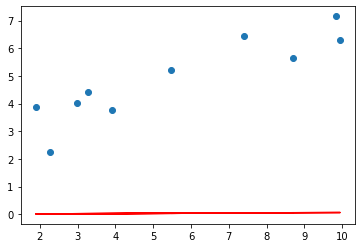

Number of learning : 100


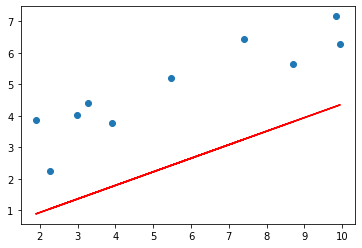

Number of learning : 200


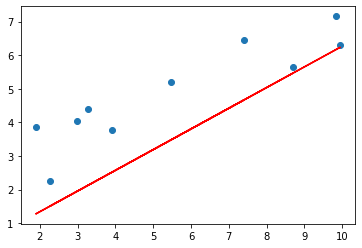

Number of learning : 300


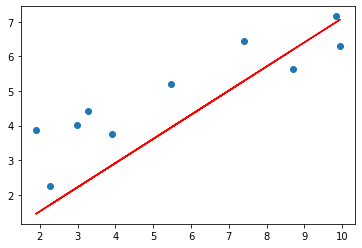

Number of learning : 400


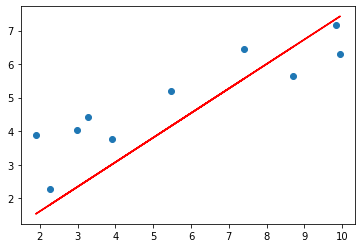

Number of learning : 500


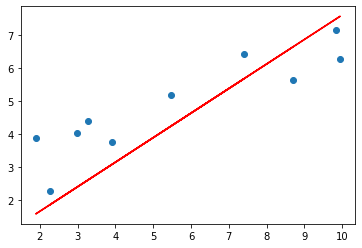

Number of learning : 600


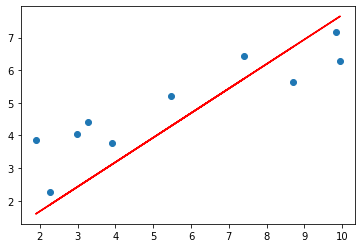

Number of learning : 700


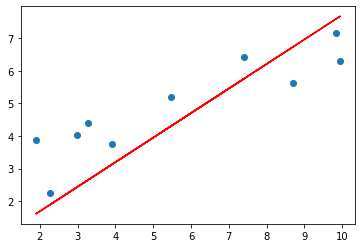

Number of learning : 800


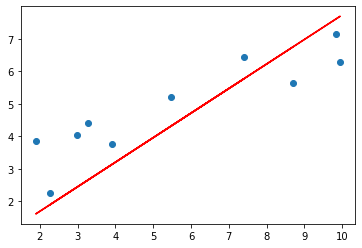

Number of learning : 900


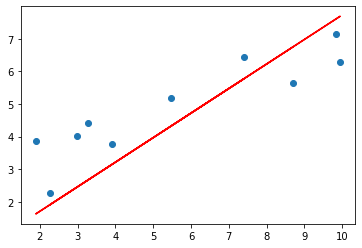

Result of Regression Algorithm after 1000 times of learning
beta_0: [0.21056] beta_1: [0.75204095]


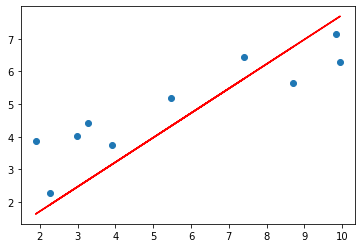

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# This function creates data and return it.
def load_data():
    
    X = np.array([[8.70153760], [3.90825773], [1.89362433], [3.28730045], [7.39333004], [2.98984649], [2.25757240], [9.84450732], [9.94589513], [5.48321616]])
    y = np.array([[5.64413093], [3.75876583], [3.87233310], [4.40990425], [6.43845020], [4.02827829], [2.26105955], [7.15768995], [6.29097441], [5.19692852]])
    
    return X, y

"""
1.  Implement a function that calculates and returns the predicted value (pred_y)
    based on the input value (X) and beta_0, beta_1.
    
    Calculate the predicted value by referring to the functional expression.
"""
def prediction(beta_0,beta_1,X):
    
    pred_y = beta_0 + beta_1 * X
    
    return pred_y
    

# This function defines how to update beta_0 and beta_1.
def update_beta(X,loss,lr):
    
    delta_0 = -(lr*(2/len(loss))*np.sum(loss))
    
    delta_1 = -(lr*(2/len(loss))*(np.dot(X.T, loss)))
    
    return delta_0, delta_1
    

"""
2.  Implement a function that calculates the loss by the number of iterations and changes the value of beta_0, beta_1.
    
"""
def gradient_descent(X, y, iters, lr):
    
    beta_0 = np.zeros((1,1))
    beta_1 = np.zeros((1,1))
    
    for i in range(iters):
        
        loss = y- prediction(beta_0, beta_1, X)
        
        beta0_delta, beta1_delta = update_beta(X, loss, lr)
        
        beta_0 -= beta0_delta
        beta_1 -= beta1_delta
        
        # Draw a graph for every 100 times.
        if i%100==0:
            print("Number of learning :",i)
            plotting_graph(X,y,beta_0,beta_1)
        
    return beta_0, beta_1


# This function visualizes graph.
def plotting_graph(X,y,beta_0,beta_1):
    
    y_pred = beta_0 + beta_1[0,0] * X
    
    fig = plt.figure()
    
    plt.scatter(X, y)
    plt.plot(X, y_pred,c='r')
    
    plt.show()


def main():
    
    # These are parameters needed for learning.
    # lr means learning rate, which determines the step size at each iteration while moving toward a minimum of a loss function.
    lr = 1e-4
    iteration = 1000
    
    X, y = load_data()
    
    beta_0, beta_1 = gradient_descent(X, y, iteration, lr)
    
    print("Result of Regression Algorithm after {} times of learning".format(iteration))
    print("beta_0:",beta_0[0], "beta_1:",beta_1[0])
    
    plotting_graph(X,y,beta_0,beta_1)
    
    return beta_0, beta_1

if __name__=="__main__":
    main()

## Gradient Descent Algorithm - update_beta()  

In the above code, the ```update_beta()``` function is written as follows :
```python
def update_beta(X,loss,lr):
    
    delta_0 = -(lr*(2/len(loss))*np.sum(loss))
    
    delta_1 = -(lr*(2/len(loss))*(np.dot(X.T, loss)))
    
    return delta_0, delta_1
```
Let's see how **delta_0** and **delta_1** are defined as the above equation.

First, **Loss function** in Regression Analysis is defined as below: 

$$MSE = \epsilon_{mse} = \frac{1}{N}\sum_{i = 1}^N \left( Y_i - \hat{{\beta}}_0 - \hat{{\beta}}_1 X_i \right)^2$$   


 $\hat{\beta_0}$ and $\hat{\beta_1}$ are the estimated values of $\beta_0$ and $\beta_1$. Loss function is a function of $\beta_0$ and $\beta_1$. 

Since $\beta_0$ and $\beta_1$ are adjusted by calculating the gradient of Loss function in **gradient descent algorithm**, these valuse can be updated as below. 

$${\beta}_0 = {\beta}_0 - {\alpha} * \frac{\delta\epsilon_{mse}}{\delta\beta_0}$$
$${\beta}_1 = {\beta}_1 - {\alpha} * \frac{\delta\epsilon_{mse}}{\delta\beta_1}$$

where $\alpha$ is the learning rate.

The partial derivatives of MSE with respect to B0 and B1 are given by

$$\frac{\delta\epsilon_{mse}}{\delta\beta_0} = -\frac{2}{N}\sum_{i = 1}^N \left( Y_i - {\beta}_0 - {\beta}_1 X_i \right) = -\frac{2}{N}\sum_{i = 1}^N \left( Y_i - \hat{Y_i} \right)$$
$$\frac{\delta\epsilon_{mse}}{\delta\beta_1} = -\frac{2}{N}\sum_{i = 1}^N ( Y_i - {\beta}_0 - {\beta}_1 X_i) * X_i = -\frac{2}{N}\sum_{i = 1}^N ( Y_i - \hat{Y_i} ) * X_i$$

Since **N** means total number of data, it can be expressed as ```len(loss)```.

Also, $\sum_{i = 1}^N ( Y_i - \hat{Y_i} ) * X_i$ can be expressed as ```np.dot(X.T, loss)```, where X.T means tranposed matrix of X. 

Thus, ```delta_0``` and ```delta_1``` can be expressed as the code above.